# Sigmoid Param

### Weight의 값이 바뀜에 따른 그래프의 변화 (Bias = 0)

/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_38417/1292721828.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_38417/1292721828.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', lut = n_w)


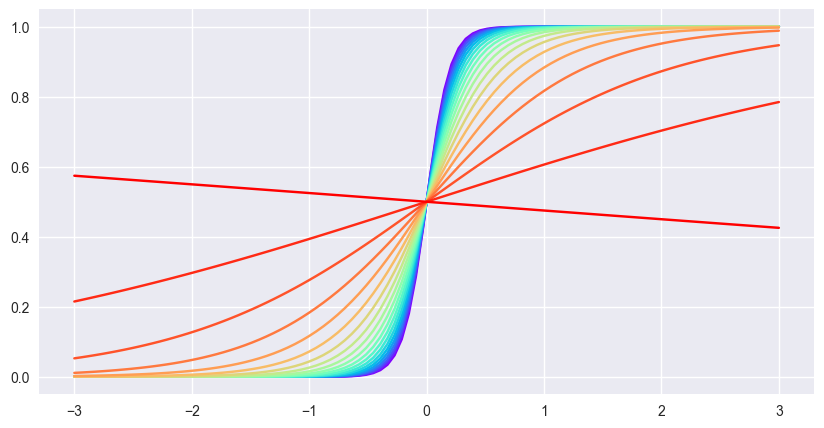

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')

x = np.linspace(-3, 3, 100)

n_w = 20
w_list = np.linspace(10, -0.1, n_w)

cmap = cm.get_cmap('rainbow', lut = n_w)

fig, ax = plt.subplots(figsize = (10, 5))
for w_idx, w in enumerate(w_list):
    z = x * w
    sig = 1 / (1 + np.exp(-z))
    
    ax.plot(x, sig, color = cmap(w_idx))
    
    

### Bias의 값이 바뀜에 따른 그래프의 변화 (Weight = 1)

/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_38417/967155737.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', lut = n_b)


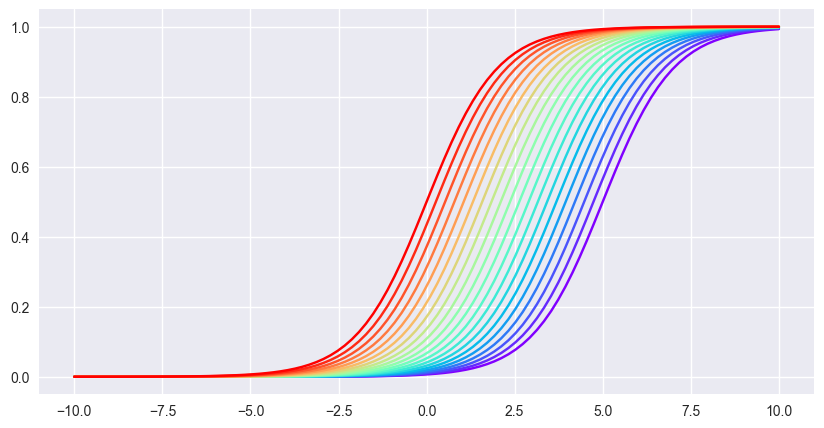

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# plt.style.use('seaborn')

x = np.linspace(-10, 10, 100)

n_b = 20
w = 1
b_list = np.linspace(-5, 0, n_b)
cmap = cm.get_cmap('rainbow', lut = n_b)

fig, ax = plt.subplots(figsize = (10, 5))
for b_idx, b in enumerate(b_list):
    z = x * w + b
    sig = 1 / (1 + np.exp(-z))
    
    ax.plot(x, sig, color = cmap(b_idx))
    
    

# Logistic Regression(1 Feature)

/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_9675/636681332.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_9675/636681332.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_data = (x_data > db).astype(np.int)
/var

0.6
[ 0.07182825 -0.47296862  1.46540763 ...  1.98682559  1.08951662
  0.83879586]
[0 0 1 ... 1 1 1]


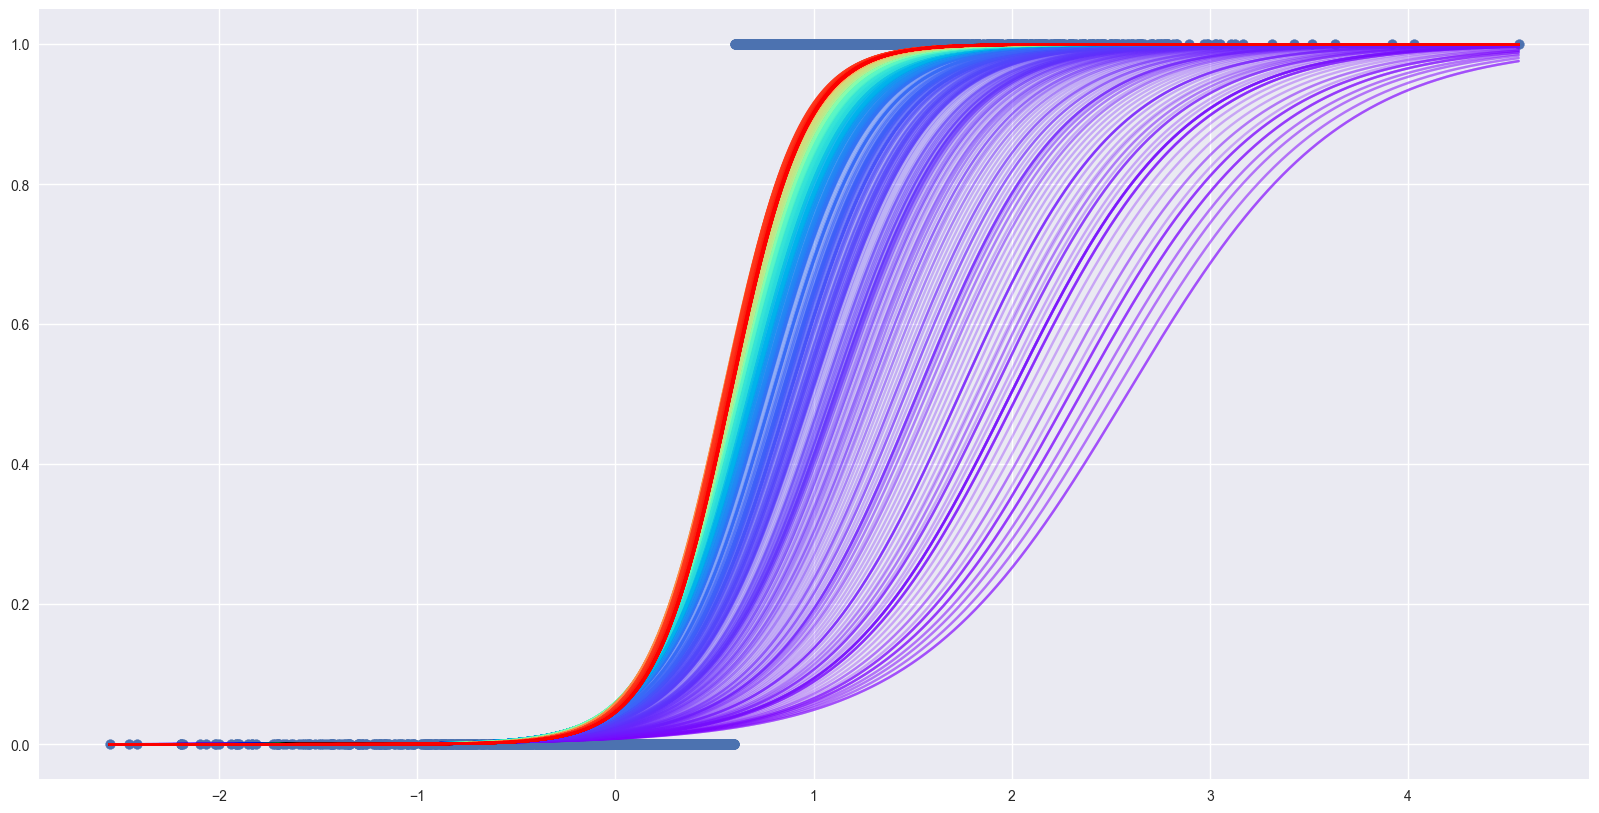

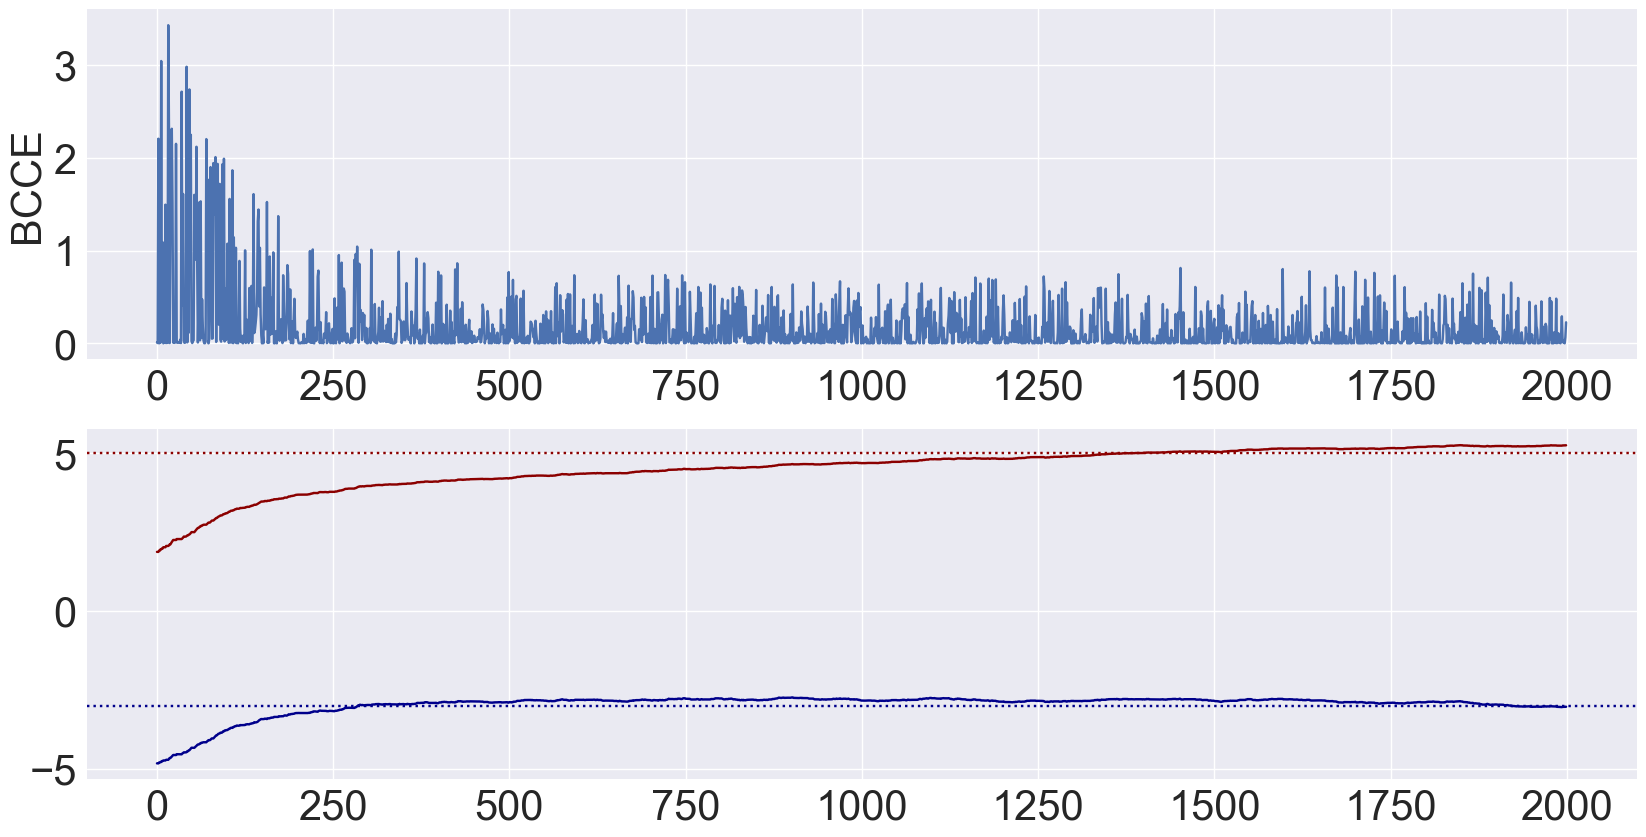

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(1) 
plt.style.use('seaborn')

# set params
N = 2000
lr = 0.03 
# t_w = np.random.normal(-3, 3, (1, ))
# t_b = np.random.normal(-3, 3, (1, ))
t_w = 5
t_b = -3

w = np.random.normal(-3, 3, (1, ))
b = np.random.normal(-3, 3, (1, ))


# generate dataset 
# x_data = np.random.randn(N, )
# y_data = x_data * t_w + t_b
# y_data = 1 / (1 + np.exp(-y_data))
# y_data = (y_data > 5).astype(np.int)



# generate dataset decision boundary
db = -t_b / t_w

# normal : 정규 분포 
# 평균 : decision_boundary 
# 표준편자 : 1
x_data = np.random.normal(db, 1, size = (N, ))
y_data = x_data * t_w + t_b
y_data = (y_data > db).astype(np.int)
fig, ax = plt.subplots(figsize = (20, 10))
ax.scatter(x_data, y_data)

J_track = list()
w_track, b_track = list(), list()

x_range = np.linspace(x_data.min(), x_data.max(), N)
cmap = cm.get_cmap('rainbow', lut = N)
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    w_track.append(w)
    b_track.append(b)
    
    # visualize updated model
    y_range = w * x_range + b
    y_range = 1 / (1 + np.exp(-y_range))
    ax.plot(x_range, y_range, color = cmap(data_idx), alpha = 0.3)

    # forward propagation
    z = x * w + b
    pred = 1 / (1 + np.exp(-z))
    J = - (y * np.log(pred) + (1-y)*np.log(1-pred))
    J_track.append(J)
    
    # jacobians
    dJ_dpred = (pred - y) / (pred * (1 - pred))
    dpred_dz = pred * (1 - pred)
    dz_dw = x
    dz_db = 1
    
    # backpropagation
    dJ_dz = dJ_dpred * dpred_dz
    dJ_dw = dJ_dz * dz_dw
    dJ_db = dJ_dz * dz_db
    
    #parameter update
    w = w - lr * dJ_dw
    b = b - lr * dJ_db
    

# visualize loss 
fig, axes = plt.subplots(2, 1, figsize = (20 ,10))
axes[0].plot(J_track)
axes[0].set_ylabel('BCCE', fontsize = 30)
axes[0].tick_params(labelsize = 30)

axes[1].axhline(y = t_w, color = 'darkred', linestyle = ':')
axes[1].plot(w_track, color = 'darkred')
axes[1].axhline(y = t_b, color = 'darkblue', linestyle = ':')
axes[1].plot(b_track, color = 'darkblue')

axes[1].tick_params(labelsize = 30)


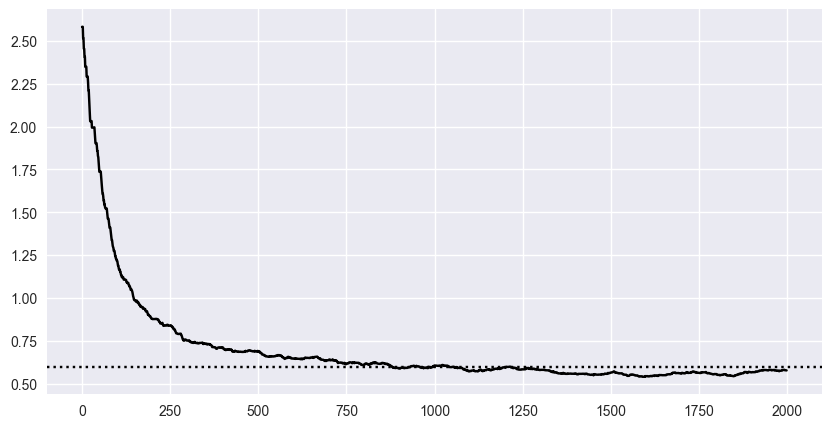

In [57]:

w_track = np.array(w_track)
b_track = np.array(b_track)

# print(w_track.shape, b_track.shape)
db_track = -b_track / w_track
db = -t_b / t_w

fig, ax = plt.subplots(figsize = (10, 5))
ax.axhline(y=db, color = 'black', linestyle = ':')
ax.plot(db_track, color = 'black')

# Logistic Regression (N Feature)

/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_18200/1021208030.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_18200/1021208030.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_data = (y_data > 0.5).astype(np.int)

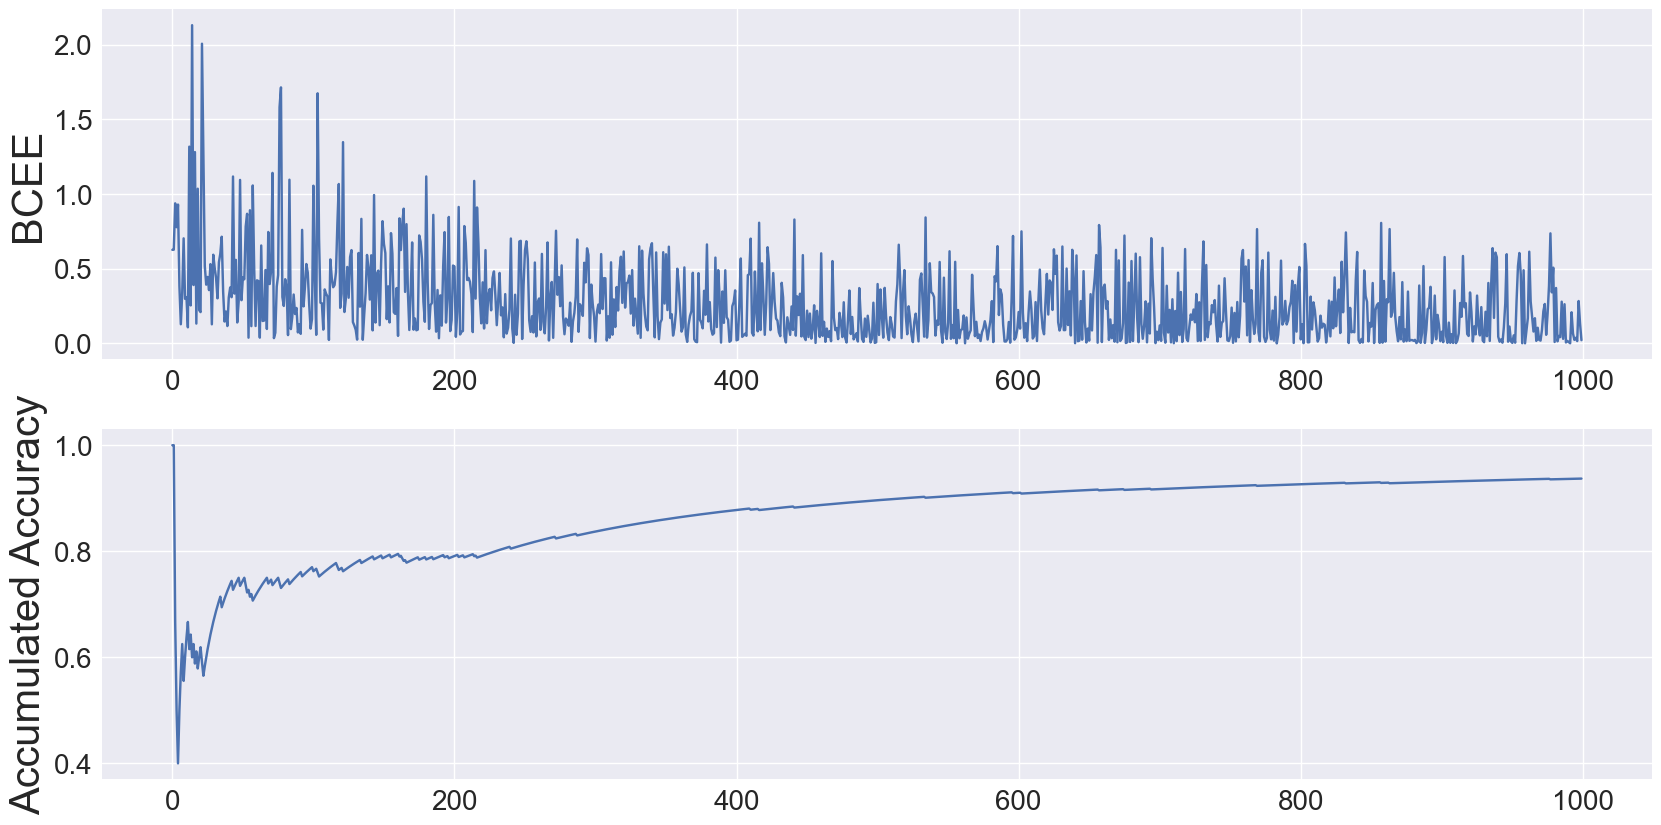

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn')
np.random.seed(1)

# set param
N, n_feature = 1000, 3
lr = 0.03 
t_W = np.random.uniform(-1, 1, (n_feature, 1))
t_b = np.random.uniform(-1, 1, (1, ))
W = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, 1))

# generate dataset
x_data = np.random.randn(N, n_feature)
y_data = x_data @ t_W + t_b
y_data = 1 / (1 + np.exp(-y_data))
y_data = (y_data > 0.5).astype(np.int)

J_track, acc_track = list(), list()
n_correct = 0
for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
    
    #forward propagation
    z = X @ W + b
    pred = 1 / (1 + np.exp(-z))
    J = - (y * np.log(pred) + (1 - y) * np.log(1 - pred))
    J_track.append(J.squeeze())
    
    # calculate accumulated accuracy
    pred_ = (pred > 0.5).astype(np.int).squeeze()
    if pred_ == y:
        n_correct += 1
    acc_track.append(n_correct / (data_idx + 1))
    
    # jacobians
    dJ_dpred = (pred - y) / (pred * (1 - pred))
    dpred_dz = pred * (1 - pred)
    dz_dW = X.reshape(1, -1)
    dz_db = 1
    
    # backpropagation
    dJ_dz = dJ_dpred * dpred_dz
    dJ_dW = dJ_dz * dz_dW
    dJ_db = dJ_dz * dz_db
    
    #parameter update 
    W = W - lr * dJ_dW.T
    b = b - lr * dJ_db
    
    
    
# visualize result 
fig, axes = plt.subplots(2, 1, figsize = (20, 10))
axes[0].plot(J_track)
axes[1].plot(acc_track)

axes[0].set_ylabel('BCEE', fontsize = 30)
axes[0].tick_params(labelsize = 20)
    
axes[1].set_ylabel('Accumulated Accuracy', fontsize = 30)
axes[1].tick_params(labelsize = 20)

